音声を録音して、音声波形や周波数の時系列変化を分析する

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [10]:
# AVAudioRecorderを使うためのモジュールを読み込む
from avfaudio.avaudio_recorder_record import *

# 録音した音声を保存するファイル名を指定する
filename = 'record.wav'

# ファイル名と録音秒数を指定して、ファイルへの録音をする
avaudio_recorder_record(filename, 5) # 5秒録音する

In [11]:
from scipy.io import wavfile
import numpy as np

# 録音した音声ファイルを読み込む
samplerate, data = wavfile.read(filename)

# 録音時間長さ[s] = データ数 / サンプルレート(データ数/録音時間[s])
length = data.shape[0] / samplerate
# 録音時間分の「横軸（時間）」リストを作る
time = np.linspace(0., length, data.shape[0])

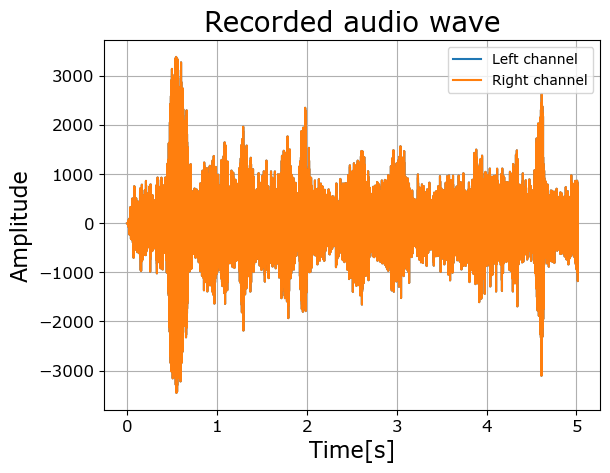

<Figure size 800x400 with 0 Axes>

In [12]:
# matplotlibで音声波形を描く
import matplotlib.pyplot as plt

# matplotlibで音声波形を図示する
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")

# 軸名や各種修飾をしておく
plt.legend()
plt.title("Recorded audio wave", fontsize=20)
plt.xlabel("Time[s]", fontsize=16)
plt.ylabel("Amplitude", fontsize=16)
plt.tick_params(labelsize=12)
plt.grid()
plt.figure(figsize=[8,4])
plt.show()

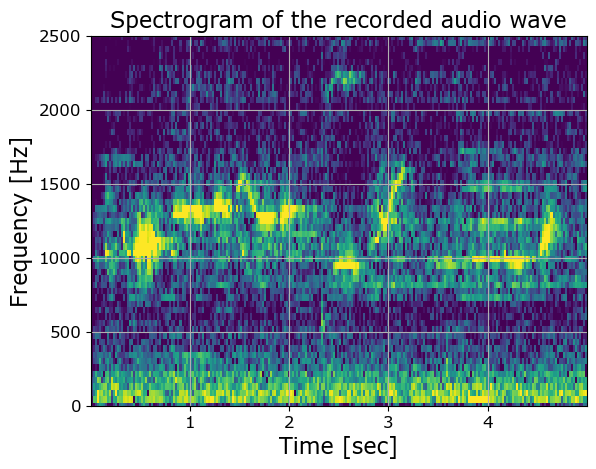

<Figure size 800x400 with 0 Axes>

In [22]:
# scipyのsignalモジュールで、スペクトログラムを図示する
from scipy import signal
import matplotlib as mpl

# 時間・周波数・強度データを作る
frequencies, times, spectrogram = signal.spectrogram(
    data[:, 0], samplerate, nperseg=1024)

# matplotlib で図示する
norm = mpl.colors.Normalize(vmin=0.001, vmax=3)
plt.pcolormesh(times, frequencies, np.log10(spectrogram),norm=norm)
plt.title("Spectrogram of the recorded audio wave", fontsize=16)
plt.ylabel('Frequency [Hz]', fontsize=16)
plt.xlabel('Time [sec]', fontsize=16)
plt.ylim([0,2500])
plt.tick_params(labelsize=12)
plt.grid()
plt.figure(figsize=[8,4])
plt.show()